In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import yfinance
from datetime import datetime
import numpy as np
from statsmodels.stats.diagnostic import het_arch
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error



tickers = ['IBM','AMD', 'INTC', 'QCOM']
df=pd.DataFrame()
dat=datetime.strptime("2020-01-01", "%Y-%m-%d")
for col in tickers:
    temp= yfinance.download(col)[['Close']]
    if temp.index[0]>dat:
        dat=temp.index[0]
    #print(dat) 
    temp=temp.rename(columns={'Close':f'{col}'}).loc[dat:]    
    #temp=temp.loc[dat:]
    #print(temp.head(1))
    #temp=np.log(temp)
    df=pd.concat([df,temp],axis=1)
    

df.head(2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IBM,AMD,INTC,QCOM
Date,,,,
2020-01-02,129.464630,49.099998,60.840000,88.690002
2020-01-03,128.432129,48.599998,60.099998,87.019997


## Tests
The Arima model is based on the auto_arima() and then 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5636.165, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5631.360, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5632.616, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5632.677, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5630.603, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5633.864, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.872 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2814.301
Date:                Thu, 19 Dec 2024   AIC                           5630.603
Time:                        03:13:48   BIC                           5635.733
Sample:                             0   HQIC                          5632.531
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


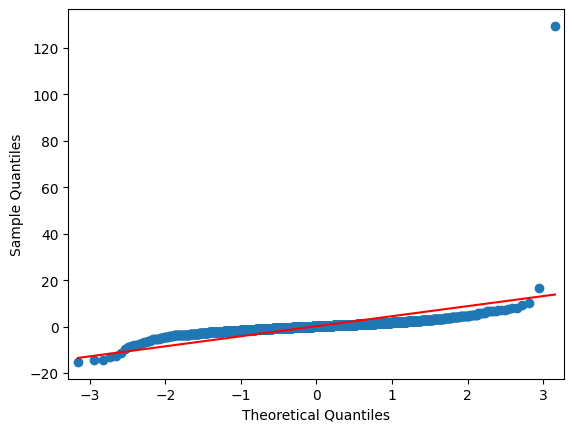

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6659.822, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6656.591, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6657.578, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6657.565, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6654.938, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6659.542, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.240 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3326.469
Date:                Thu, 19 Dec 2024   AIC                           6654.938
Time:                        03:13:50   BIC                           6660.068
Sample:                             0   HQIC                          6656.867
          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


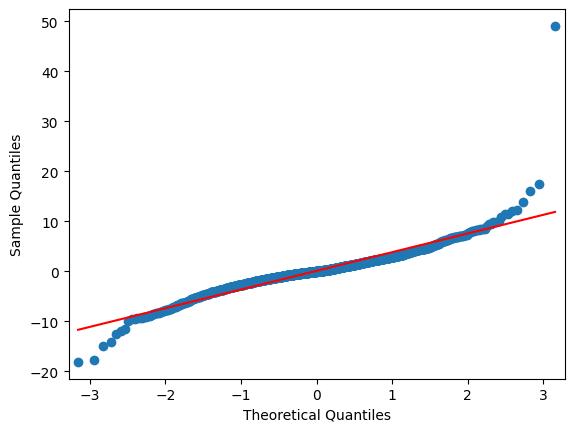

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3965.218, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4002.299, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3970.649, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3975.857, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4001.260, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3964.924, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3962.932, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3964.918, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3968.491, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3966.932, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3962.005, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3975.161, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3964.000, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3963.997, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]          

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


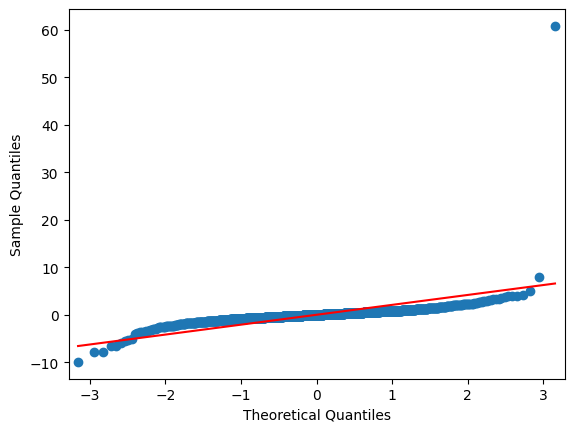

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6669.013, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6676.263, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6674.534, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6665.817, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6665.807, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6667.502, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6662.169, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6664.162, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6664.154, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6662.179, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6665.869, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.930 seconds
                      

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


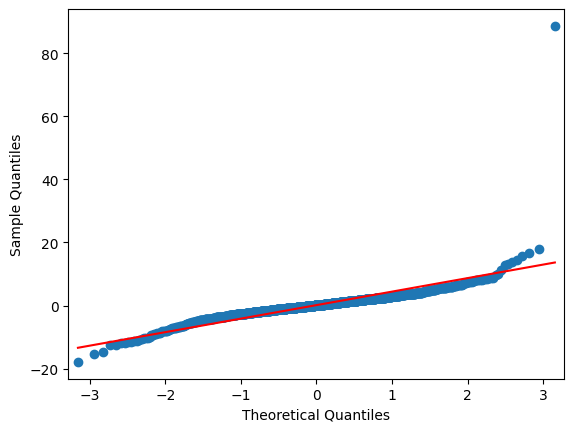

In [2]:
for tick in tickers:
    model=auto_arima(df[tick],seasonal=True,trace=True,stepwise=True)
    print(model.summary())
    

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    models=SARIMAX(df[tick], order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()
    resids=models.resid
    ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
    
    print(f"{tick} ")
    print(f'P: {P}  Q: {Q}  D: {D}  m: {m}, p: {p}  q: {q}, d: {d}')
    print(f'{tick} Ljung-Box test: {ljung["lb_pvalue"].values[0]}')
    print('\n')
    test_stat, p_value, _, _ = het_arch(resids)
    print("ARCH-LM Test p-value:", p_value)
    
    stat, p = shapiro(resids)
    print(f"Shapiro-Wilk Test p-value: {p}")


    sm.qqplot(resids, line='s')
    plt.show()


## test -2
The shapiro test shows the lack of normality on the residuals of the arima model.


In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


minmax = MinMaxScaler(feature_range=(0,1))
df_minmax=pd.DataFrame(minmax.fit_transform(df), index=df.index, columns=df.columns)
# Scaling the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

#print(df_scaled.head())
df_minmax.head()

,IBM,AMD,INTC,QCOM
Date,,,,
2020-01-02,0.263585,0.060173,0.846107,0.167168
2020-01-03,0.256582,0.057277,0.831182,0.157119
2020-01-06,0.255026,0.056061,0.827753,0.154050
2020-01-07,0.255609,0.055250,0.807584,0.168853
2020-01-08,0.262872,0.052818,0.808390,0.167288


## Redo the Test
- Shapiro
- Ljung-Box test
- ARCH-LM Test

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_standardized = StandardScaler().fit_transform(df)
pd.DataFrame(df_standardized,columns=df.columns).head()

,IBM,AMD,INTC,QCOM
0,-0.451585,-1.509020,1.410070,-1.546208
1,-0.487619,-1.522882,1.351528,-1.601427
2,-0.495627,-1.528705,1.338080,-1.618290
3,-0.492624,-1.532586,1.258970,-1.536950
4,-0.455255,-1.544231,1.262134,-1.545547


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6845.546, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6850.630, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6849.420, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6849.356, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6851.117, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6848.068, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.983 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3426.558
Date:                Wed, 18 Dec 2024   AIC                          -6851.117
Time:                        03:48:33   BIC                          -6845.988
Sample:                             0   HQIC                         -6849.188
    

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


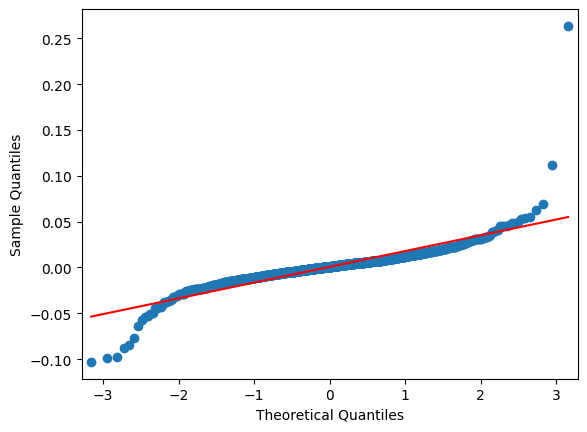

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6201.008, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6206.704, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6205.747, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6205.760, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6208.320, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6203.786, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.971 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1249
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3105.160
Date:                Wed, 18 Dec 2024   AIC                          -6208.320
Time:                        03:48:35   BIC                          -6203.191
Sample:                             0   HQIC                         -6206.392
    

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


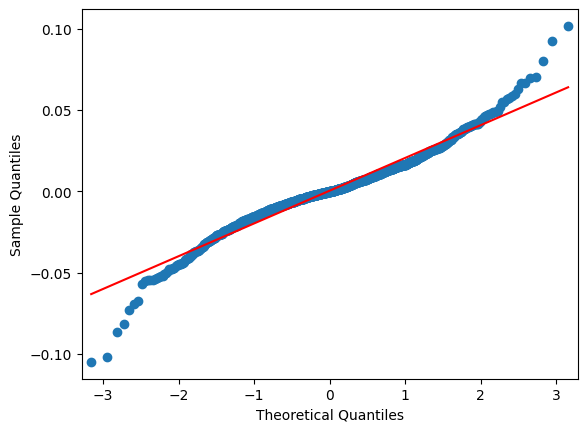

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5781.264, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5744.109, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5775.851, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5770.613, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5745.200, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5781.622, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5783.548, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-5781.628, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5778.050, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5779.613, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5784.534, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5771.371, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5782.120, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-5782.608, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


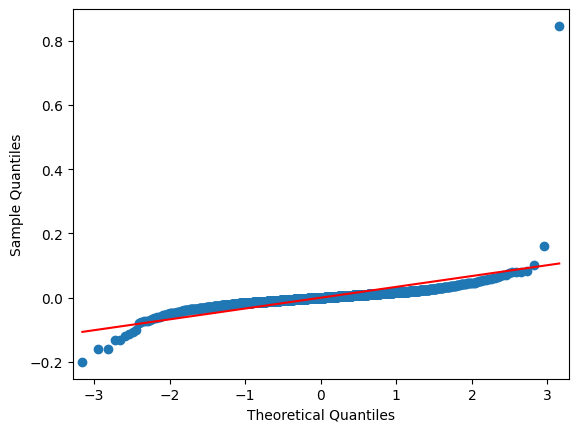

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6099.508, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6092.287, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6104.737, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6104.743, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6093.973, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6102.755, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6102.736, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6100.764, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6106.342, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6104.360, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6104.337, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6106.346, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-6104.355, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6102.367, Time=0.24 sec

Best model:  ARIMA

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


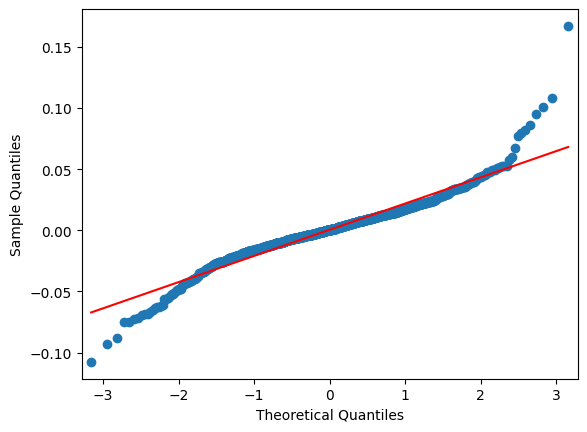

In [17]:

for tick in tickers:
    model=auto_arima(df_minmax[tick],seasonal=True,trace=True,stepwise=True)
    print(model.summary())
    

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    models=SARIMAX(df_minmax[tick], order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()
    resids=models.resid
    ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
    print(f"{tick} ")
    print(f'P: {P}  Q: {Q}  D: {D}  m: {m}, p: {p}  q: {q}, d: {d}')
    print(f'{tick} Ljung-Box test: {ljung["lb_pvalue"].values[0]}')
    print('\n')
    test_stat, p_value, _, _ = het_arch(resids)
    print("ARCH-LM Test p-value:", p_value)
    
    #garch_model = arch_model(df['log_returns'], vol="Garch", p=1, q=1)
    #garch_result = garch_model.fit(disp="off")
    
    stat, p = shapiro(resids)
    print(f"Shapiro-Wilk Test p-value: {p}")


    sm.qqplot(resids, line='s')
    plt.show()


In [14]:
print(models.summary()) 

                               SARIMAX Results                                
Dep. Variable:                   QCOM   No. Observations:                  242
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  20.222
Date:                Mon, 16 Dec 2024   AIC                            -36.444
Time:                        19:47:22   BIC                            -29.474
Sample:                             0   HQIC                           -33.636
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1808      0.056     -3.205      0.001      -0.291      -0.070
sigma2         0.0495      0.003     14.450      0.000       0.043       0.056
Ljung-Box (L1) (Q):                   0.00   Jarque-

## StandardScaling or MinMaxScaling ?
Testing if the Standard scaling is better or the MinMaxScaler


In [17]:
import pandas as pd
data=[df, df_minmax, df_scaled]
df_names = {
    "df": df,
    "df_minmax": df_minmax,
    "df_scaled": df_scaled
}

tickers = ['IBM','AMD', 'INTC', 'QCOM']
aic={}
bic={}
for d  in data:
    #print(f"\nProcessing DataFrame: {df_names[d]}")
    for tick in tickers:
        model=auto_arima(d[tick], seasonal=False)
        resids=model.resid()
        aic[tick]=model.aic()
        bic[tick] = model.bic()
        ljung=acorr_ljungbox(resids, lags=[10], return_df=True)
        print(f"LjungBox test for: {tick} ")
        print(f' Ljung-Box test: {ljung["lb_pvalue"].values[0]}')

    
print(pd.DataFrame(aic, index=["AIC"]))
print(pd.DataFrame(bic,index=["BIC"]))

LjungBox test for: IBM 
 Ljung-Box test: 0.9764570593465202
LjungBox test for: AMD 
 Ljung-Box test: 0.7523114877988423
LjungBox test for: INTC 
 Ljung-Box test: 0.9685836447256992
LjungBox test for: QCOM 
 Ljung-Box test: 0.9024760854315798
LjungBox test for: IBM 
 Ljung-Box test: 0.024484791791101978
LjungBox test for: AMD 
 Ljung-Box test: 0.5329622632015838
LjungBox test for: INTC 
 Ljung-Box test: 0.611287552339153
LjungBox test for: QCOM 
 Ljung-Box test: 0.3422903370895944
LjungBox test for: IBM 
 Ljung-Box test: 0.003984455822247269
LjungBox test for: AMD 
 Ljung-Box test: 0.7639965483572391
LjungBox test for: INTC 
 Ljung-Box test: 0.010014314226461396
LjungBox test for: QCOM 
 Ljung-Box test: 0.3391279244212301
            IBM          AMD         INTC         QCOM
AIC -2755.95953 -2300.416188 -2370.866503 -1854.349768
             IBM         AMD        INTC         QCOM
BIC -2750.830232 -2295.28689 -2355.47861 -1844.091173


In [13]:

forecast_steps=10
def plotting_forecast(df, tick, model, forecast_steps):
        forecast = model.forecast(steps=forecast_steps)
        forecast_index = pd.date_range(start=df[tick].index[-1], periods=forecast_steps + 1, freq='B')[1:]

        forecast_series= pd.DataFrame({"forecast":forecast,"date":forecast_index}).set_index("date")

        print(forecast_series.head()) 
        
        plt.figure(figsize=(12, 6))
        plt.plot(df[tick], label='Historical Data', color='blue')
        plt.plot(forecast_series, label='Forecast', color='red')

        start_date = '2024-05-01'
        end_date = forecast_index[-1]
        plt.xlim(pd.Timestamp(start_date), end_date)

        plt.title(f'{tick} Stock Price Forecast')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

for tick in tickers:
    model = auto_arima(df_minmax[tick],seasonal=True,trace=True,stepwise=True)
    
    print(f"Best ARIMA parameters for {tick}: {model.order}")

    #decomposition = seasonal_decompose(df_minmax[tick], model='additive', period=12)
    #decomposition.plot()
    #plt.suptitle(f'Time Series Decomposition for {tick}')
    #plt.show()

    p, d, q = model.order
    P, D, Q, m = model.seasonal_order
    
    print(f"P, D, Q, m: {P, D, Q, m}")
    
    sarimax_model = SARIMAX(df_minmax[tick],
                            #m=252, 
                            order=(p, d, q), 
                            seasonal_order=(P, D, Q, m)).fit()

    in_sample_forecast = sarimax_model.predict(start=0, end=len(df_minmax)-1,typ="levels")
    rmse = mean_squared_error(df_minmax[tick], in_sample_forecast, squared=False)

    print(f"MSE for {tick}: {rmse} ")
    
    print(f"Summary for {tick}:")
    print(sarimax_model.summary())
    
    print(f"End of the summary for {tick}\n")
    
    residuals = sarimax_model.resid
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f"the ljungbox test: \n",lb_test)
    
    #plt.plot(in_sample_forecast, label='In-sample forecast',color='blue')
    #plt.plot(df_minmax[tick], label='Actual data',color='red')
    #plt.show()
    
    #plotting_forecast(df_minmax, tick, sarimax_model, forecast_steps)
#model = auto_arima(df["NVDA"],seasonal=True,m=12,trace=True,stepwise=True)
#print(model.order)
#print(model.seasonal_order)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6845.546, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6850.630, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6849.420, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6849.356, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6851.117, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6848.068, Time=0.40 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.928 seconds
Best ARIMA parameters for IBM: (0, 1, 0)
P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.74344D+00    |proj g|=  1.01078D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of B

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6201.008, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6206.704, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6205.747, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6205.760, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6208.320, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6203.786, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.044 seconds
Best ARIMA parameters for AMD: (0, 1, 0)
P, D, Q, m: (0, 0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.48612D+00    |proj g|=  1.50982D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of activ

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5781.264, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5744.109, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5775.851, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5770.613, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5745.200, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5781.622, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5783.548, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-5781.628, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5778.050, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5779.613, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5784.534, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5771.371, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5782.120, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-5782.608, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5778.708, Time=0.16

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6099.508, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6092.287, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6104.737, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6104.743, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6093.973, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6102.755, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6102.736, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6100.764, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6106.342, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6104.360, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6104.337, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6106.346, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-6104.355, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6102.367, Time=0.23 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time:

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Processing IBM...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5636.165, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5631.360, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5632.616, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5632.677, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5630.603, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5633.864, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.750 seconds
                               SARIMAX Results                                
Dep. Variable:                    IBM   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2814.301
Date:                Thu, 19 Dec 2024   AIC                           5630.603
Time:                        03:32:50   BIC                           5635.733
Sample:                             0   HQIC                          5

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


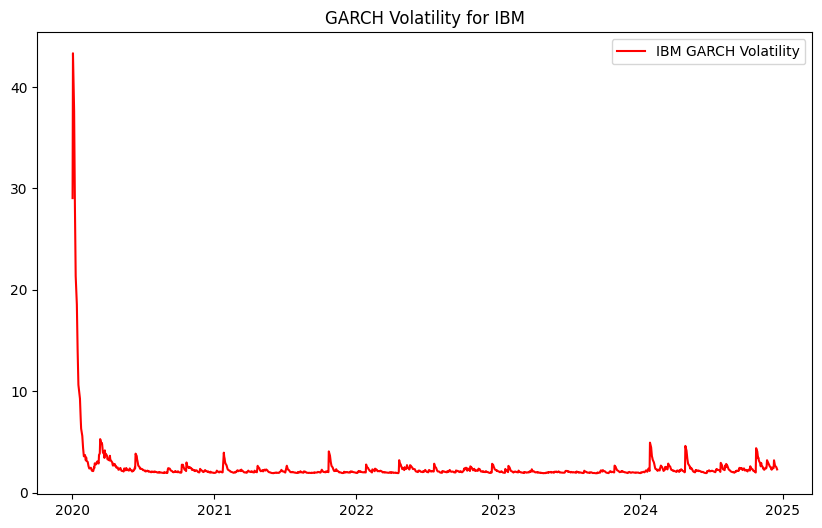

Processing AMD...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6659.822, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6656.591, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6657.578, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6657.565, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6654.938, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6659.542, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.248 seconds
                               SARIMAX Results                                
Dep. Variable:                    AMD   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3326.469
Date:                Thu, 19 Dec 2024   AIC                           6654.938
Time:                        03:32:52   BIC                           6660.068
Sample:                             0   HQIC                          6

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


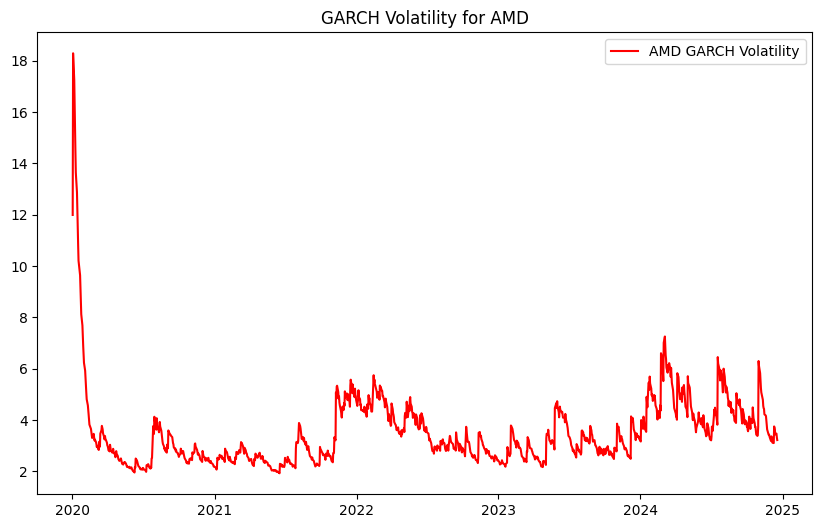

Processing INTC...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3965.218, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4002.299, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3970.649, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3975.857, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4001.260, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3964.924, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3962.932, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3964.918, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3968.491, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3966.932, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3962.005, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3975.161, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3964.000, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3963.997, Time=0.08 sec
 ARIMA(1,1,1)(

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


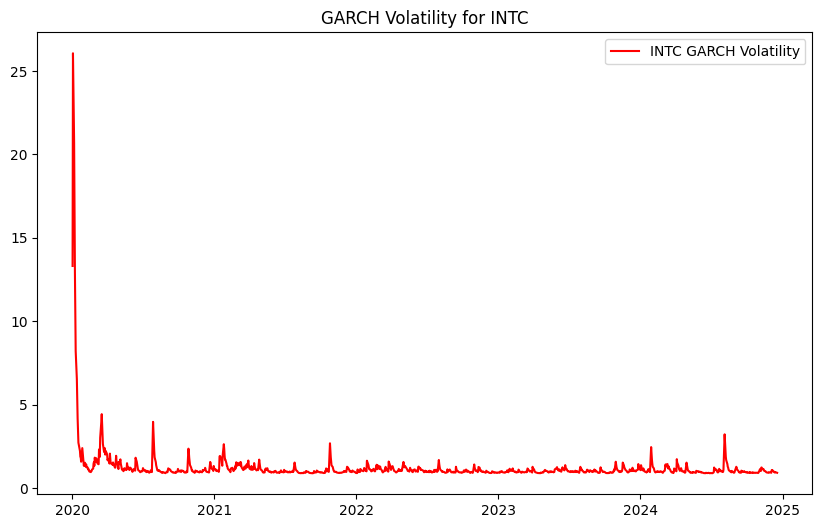

Processing QCOM...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6669.013, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6676.263, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6674.534, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6665.817, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6665.807, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6667.502, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6662.169, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6664.162, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6664.154, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6662.179, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6665.869, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.906 seconds
   

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


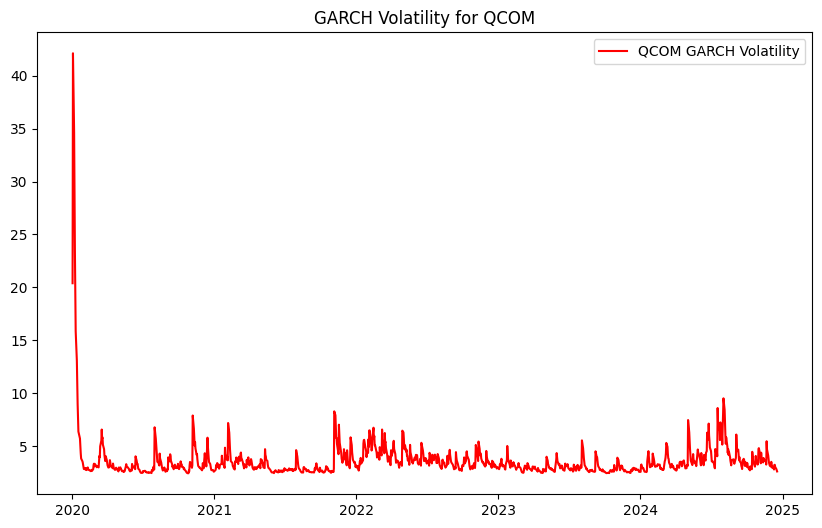

      Ljung-Box p-value  Jarque-Bera p-value  Heteroskedasticity p-value  \
IBM            0.970359                  0.0                5.424350e-06   
AMD            0.741389                  0.0                1.141286e-09   
INTC           0.967868                  0.0                1.671394e-19   
QCOM           0.901341                  0.0                3.839163e-09   

      Shapiro-Wilk p-value        MSE  
IBM           5.881119e-55  18.709420  
AMD           2.554654e-29  13.965039  
INTC          2.892760e-54   4.350277  
QCOM          1.098777e-41  18.379554  


In [9]:
from pmdarima import auto_arima

for tick in tickers:
    print(f"Processing {tick}...")

    model = auto_arima(df[tick], seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
    order = model.order

    sarimax_model = SARIMAX(df[tick], order=order)
    result = sarimax_model.fit(disp=False)
    resids = result.resid

    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    jb_stat, jb_pvalue = jarque_bera(resids)
    arch_stat, arch_pvalue, _, _ = het_arch(resids)
    shapiro_stat, shapiro_pvalue = shapiro(resids)
    mse = np.mean(resids ** 2)

    results[tick] = {
        'Ljung-Box p-value': ljung['lb_pvalue'].values[0],
        'Jarque-Bera p-value': jb_pvalue,
        'Heteroskedasticity p-value': arch_pvalue,
        'Shapiro-Wilk p-value': shapiro_pvalue,
        'MSE': mse
    }

    print(result.summary())
    print(f"Ljung-Box p-value: {ljung['lb_pvalue'].values[0]}")
    print(f"Jarque-Bera p-value: {jb_pvalue}")
    print(f"Heteroskedasticity p-value: {arch_pvalue}")
    print(f"Shapiro-Wilk p-value: {shapiro_pvalue}")
    print(f"MSE: {mse}\n")

    if arch_pvalue < 0.05:
        print(f"Fitting GARCH model for {tick}...")
        garch_model = arch_model(resids, vol='Garch', p=1, q=1)
        garch_result = garch_model.fit(disp="off")
        print(garch_result.summary())

        plt.figure(figsize=(10, 6))
        plt.plot(garch_result.conditional_volatility, label=f'{tick} GARCH Volatility', color='red')
        plt.title(f'GARCH Volatility for {tick}')
        plt.legend()
        plt.show()

results_df = pd.DataFrame(results).T
print(results_df)
#results_df.to_csv("model_results.csv", index=True)


## Final Model

Processing IBM...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5636.165, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5631.360, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5632.616, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5632.677, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5630.603, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5633.864, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.749 seconds
                               SARIMAX Results                                
Dep. Variable:                    IBM   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2814.301
Date:                Thu, 19 Dec 2024   AIC                           5630.603
Time:                        03:41:45   BIC                           5635.733
Sample:                             0   HQIC                          5

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6659.822, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6656.591, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6657.578, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6657.565, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6654.938, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6659.542, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.206 seconds
                               SARIMAX Results                                
Dep. Variable:                    AMD   No. Observations:                 1250
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3326.469
Date:                Thu, 19 Dec 2024   AIC                           6654.938
Time:                        03:41:46   BIC                           6660.068
Sample:                             0   HQIC                          6656.867
                               - 1250                

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3965.218, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4002.299, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3970.649, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3975.857, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4001.260, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3964.924, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3962.932, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3964.918, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3968.491, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3966.932, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3962.005, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3975.161, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3964.000, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3963.997, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3967.741, Time=0.09 sec
 ARIMA(1,1

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6669.013, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6676.263, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6663.827, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6674.534, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6665.817, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6665.807, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6667.502, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6662.169, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6664.162, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6664.154, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6662.179, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6665.869, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.928 seconds
                               SARIMAX Results                   

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


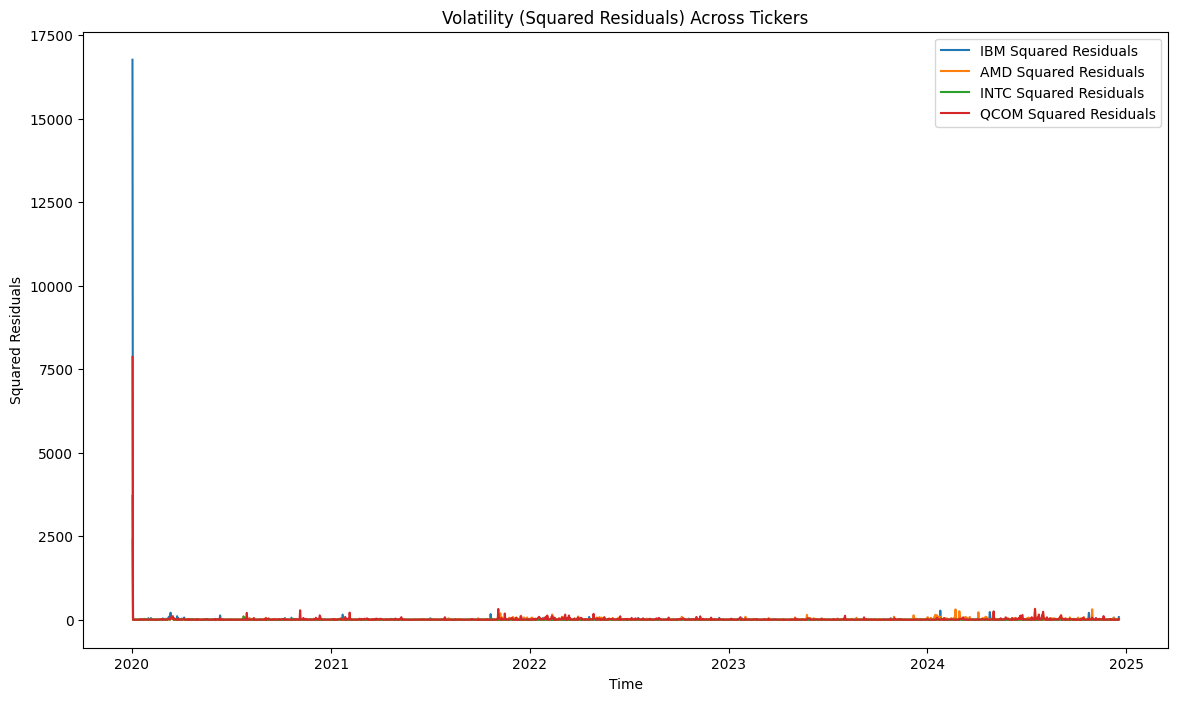

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, shapiro
from pmdarima import auto_arima

tickers = ['IBM', 'AMD', 'INTC', 'QCOM']
results = {}
volatility_data = pd.DataFrame()

for tick in tickers:
    print(f"Processing {tick}...")

    model = auto_arima(df[tick], seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
    order = model.order

    sarimax_model = SARIMAX(df[tick], order=order)
    result = sarimax_model.fit(disp=False)
    resids = result.resid

    ljung = acorr_ljungbox(resids, lags=[10], return_df=True)
    jb_stat, jb_pvalue = jarque_bera(resids)
    arch_stat, arch_pvalue, _, _ = het_arch(resids)
    shapiro_stat, shapiro_pvalue = shapiro(resids)
    mse = np.mean(resids ** 2)

    results[tick] = {
        'Ljung-Box p-value': ljung['lb_pvalue'].values[0],
        'Jarque-Bera p-value': jb_pvalue,
        'Heteroskedasticity p-value': arch_pvalue,
        'Shapiro-Wilk p-value': shapiro_pvalue,
        'MSE': mse
    }

    print(result.summary())
    print(f"Ljung-Box p-value: {ljung['lb_pvalue'].values[0]}")
    print(f"Jarque-Bera p-value: {jb_pvalue}")
    print(f"Heteroskedasticity p-value: {arch_pvalue}")
    print(f"Shapiro-Wilk p-value: {shapiro_pvalue}")
    print(f"MSE: {mse}\n")

    volatility_data[tick] = resids**2

results_df = pd.DataFrame(results).T
print("Summary of Results:")
print(results_df)
results_df.to_csv("model_results_without_garch.csv", index=True)

plt.figure(figsize=(14, 8))
for tick in tickers:
    plt.plot(volatility_data[tick], label=f'{tick} Squared Residuals')
plt.title('Volatility (Squared Residuals) Across Tickers')
plt.xlabel('Time')
plt.ylabel('Squared Residuals')
plt.legend()
plt.show()


In [34]:
resids=pd.read_csv("model_results.csv").rename(columns={"Unnamed: 0":"ticker"})
resids.head()
#resids=resids.set_index("ticker")
#np.log(resids.drop(columns=["MSE"])).plot(kind="bar", figsize=(12, 6))

,ticker,Ljung-Box p-value,Jarque-Bera p-value,Heteroskedasticity p-value,Shapiro-Wilk p-value,MSE
0,IBM,0.970359,0.0,5.424350e-06,5.881119e-55,18.709420
1,AMD,0.741389,0.0,1.141286e-09,2.554654e-29,13.965039
2,INTC,0.967868,0.0,1.671394e-19,2.892760e-54,4.350277
3,QCOM,0.901341,0.0,3.839163e-09,1.098777e-41,18.379554


Summary of Results:
      Ljung-Box p-value  Jarque-Bera p-value  Heteroskedasticity p-value  \
IBM            0.970359                  0.0                5.424350e-06   
AMD            0.741389                  0.0                1.141286e-09   
INTC           0.967868                  0.0                1.671394e-19   
QCOM           0.901341                  0.0                3.839163e-09   

      Shapiro-Wilk p-value        MSE  
IBM           5.881119e-55  18.709420  
AMD           2.554654e-29  13.965039  
INTC          2.892760e-54   4.350277  
QCOM          1.098777e-41  18.379554  


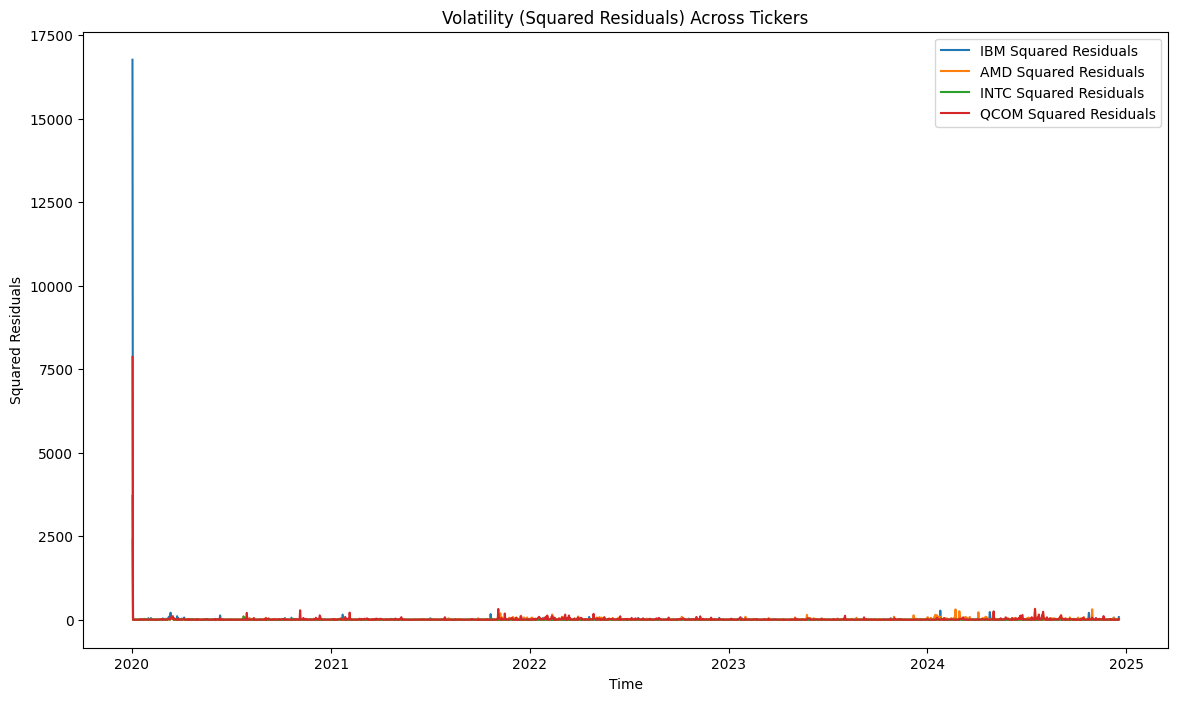

In [26]:
results_df = pd.DataFrame(results).T
print("Summary of Results:")
print(results_df)
results_df.to_csv("model_results_without_garch.csv", index=True)

plt.figure(figsize=(14, 8))
for tick in tickers:
    plt.plot(volatility_data[tick], label=f'{tick} Squared Residuals')
plt.title('Volatility (Squared Residuals) Across Tickers')
plt.xlabel('Time')
plt.ylabel('Squared Residuals')
plt.legend()
plt.show()



## Other Models 

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer 

            forecast
date                
2024-12-17  0.911138
2024-12-18  0.914729
2024-12-19  0.918320
2024-12-20  0.921911
2024-12-23  0.925501


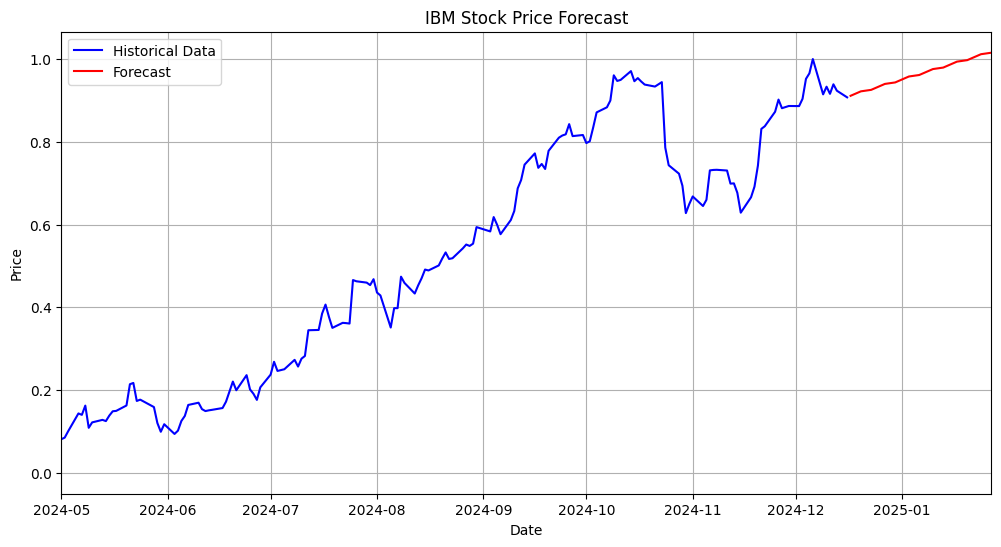

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(df_minmax["IBM"], trend='add', seasonal=None).fit()
ets_forecast = ets_model.forecast(steps=forecast_steps)

#plt.plot(df_minmax["IBM"], label='Historical Data', color='blue')
#plt.plot(ets_forecast, label='Forecast', color='red')
plotting_forecast(df_minmax, "IBM", ets_model, 30)

23:50:07 - cmdstanpy - INFO - Chain [1] start processing
23:50:07 - cmdstanpy - INFO - Chain [1] done processing
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


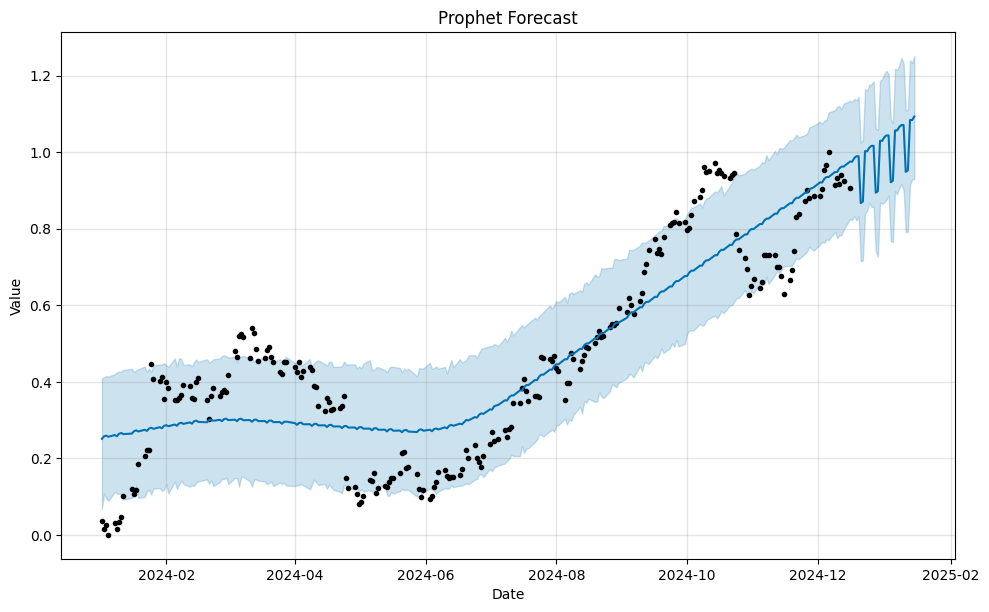

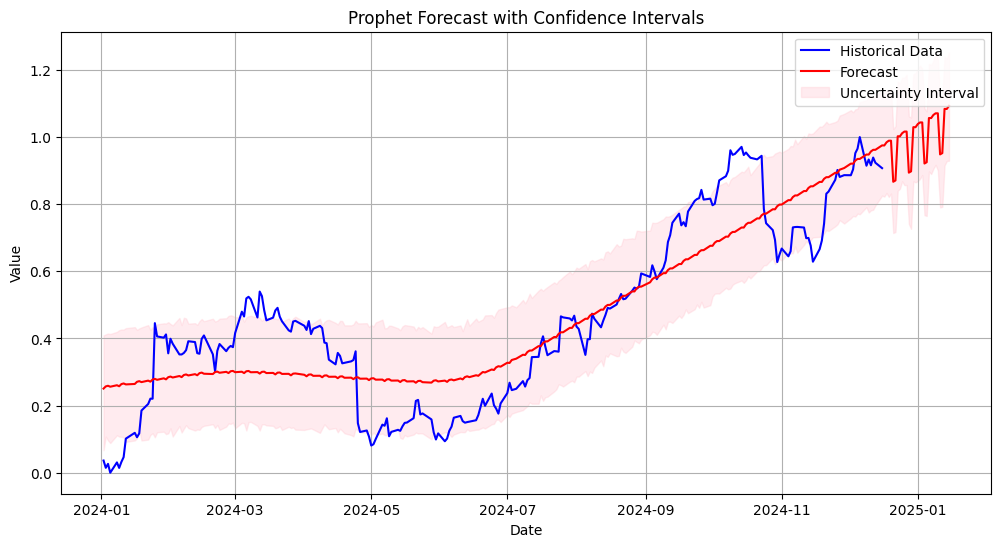

In [58]:
from prophet.make_holidays import make_holidays_df
from prophet import Prophet

forecast_steps = 30
df_prophet = df_minmax["IBM"].reset_index().rename(columns={'Date': 'ds', 'IBM': 'y'})


model = Prophet().fit(df_prophet)
future = model.make_future_dataframe(periods=forecast_steps)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label="Historical Data", color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color='red')

plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='pink',
    alpha=0.3,
    label="Uncertainty Interval"
)

plt.title("Prophet Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Comparison

               IBM          AMD         INTC         QCOM
count  1248.000000  1248.000000  1248.000000  1248.000000
mean      4.940230     4.577444     3.715065     4.881728
std       0.181466     0.357646     0.316703     0.236495
min       4.506480     3.656098     2.938633     4.109397
25%       4.815052     4.366373     3.442899     4.756990
50%       4.900666     4.565129     3.796163     4.895187
75%       4.989327     4.849351     3.982062     5.048910
max       5.472439     5.353657     4.226396     5.425346


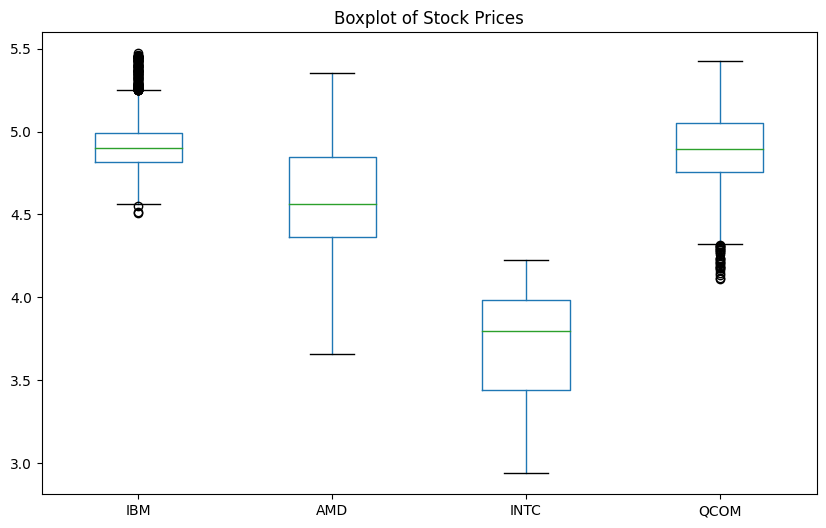

In [ ]:
import pandas as pd

print(df.describe())

df.boxplot(figsize=(10, 6), grid=False)
plt.title("Boxplot of Stock Prices")
plt.show()


In [64]:
from scipy.stats import f_oneway

# Perform ANOVA test
stat, p = f_oneway(df['IBM'], df['AMD'], df['INTC'], df['QCOM'])
print(f"ANOVA Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Reject H₀: At least one company has a significantly different mean price.")
else:
    print("Fail to reject H₀: No significant difference in mean prices.")


ANOVA Statistic: 5029.517828661708, p-value: 0.0
Reject H₀: At least one company has a significantly different mean price.


In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_melt = pd.melt(df.reset_index(), id_vars='Date', var_name='Company', value_name='Price')

tukey = pairwise_tukeyhsd(df_melt['Price'], df_melt['Company'], alpha=0.05)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   AMD    IBM   0.3628   0.0  0.3338  0.3918   True
   AMD   INTC  -0.8624   0.0 -0.8913 -0.8334   True
   AMD   QCOM   0.3043   0.0  0.2753  0.3332   True
   IBM   INTC  -1.2252   0.0 -1.2541 -1.1962   True
   IBM   QCOM  -0.0585   0.0 -0.0875 -0.0295   True
  INTC   QCOM   1.1667   0.0  1.1377  1.1956   True
---------------------------------------------------


Correlation Matrix:
           IBM       AMD      INTC      QCOM
IBM   1.000000  0.679854 -0.578941  0.532685
AMD   0.679854  1.000000 -0.362509  0.833446
INTC -0.578941 -0.362509  1.000000 -0.287220
QCOM  0.532685  0.833446 -0.287220  1.000000


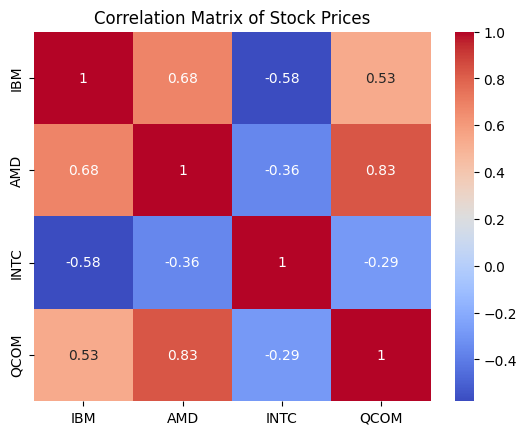

In [68]:
correlation = df.corr()
print("Correlation Matrix:")
print(correlation)

import seaborn as sns
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Stock Prices")
plt.show()


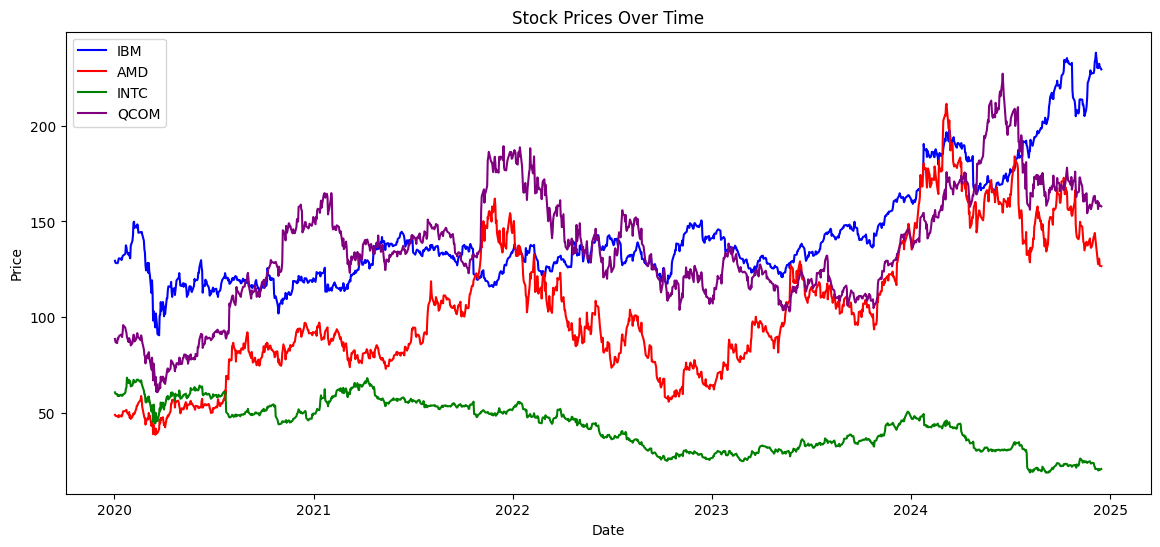

In [87]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(df['IBM'], label='IBM', color='blue')
plt.plot(df['AMD'], label='AMD', color='red')
plt.plot(df['INTC'], label='INTC', color='green')
plt.plot(df['QCOM'], label='QCOM', color='purple')
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

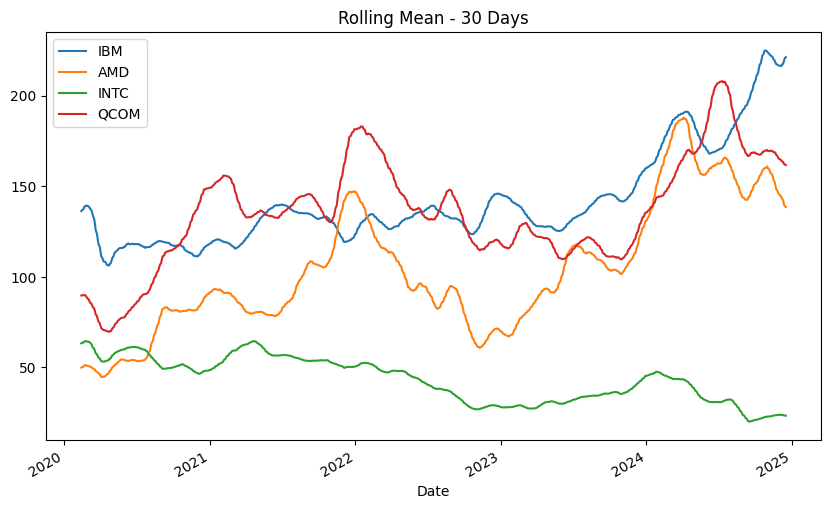

In [85]:
rolling_std = df.rolling(window=30).mean()
rolling_std.plot(figsize=(10, 6))
plt.title("Rolling Mean - 30 Days")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import coint

stat, p_value, _ = coint(df['QCOM'], df['INTC'])
print(f"Cointegration Test p-value: {p_value}")

if p_value < 0.05:
    print("Reject H0: IBM and INTC are cointegrated. move together over time")

Cointegration Test p-value: 0.3876217787889601


                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          4.98e-170
Time:                        00:40:25   Log-Likelihood:                 746.66
No. Observations:                1248   AIC:                            -1489.
Df Residuals:                    1246   BIC:                            -1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3612      0.048     69.449      0.0

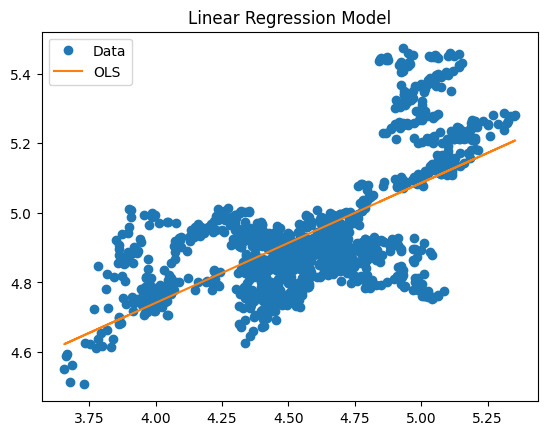

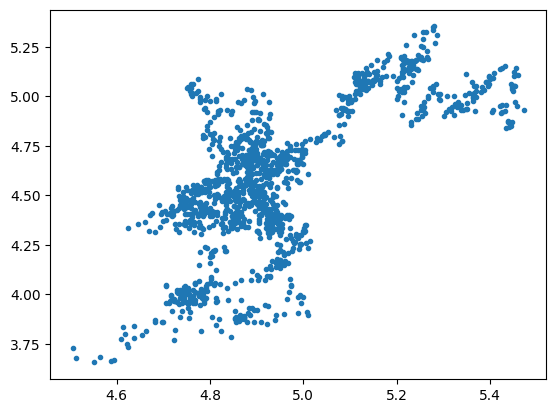

In [82]:
import statsmodels.api as sm

X = df['AMD']
y = df['IBM']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())
plt.plot(X['AMD'], y, 'o', label="Data")
plt.plot(X['AMD'], model.fittedvalues, label="OLS")
plt.legend()
plt.title("Linear Regression Model")
plt.show()

plt.plot(df['IBM'],df['AMD'],'.')

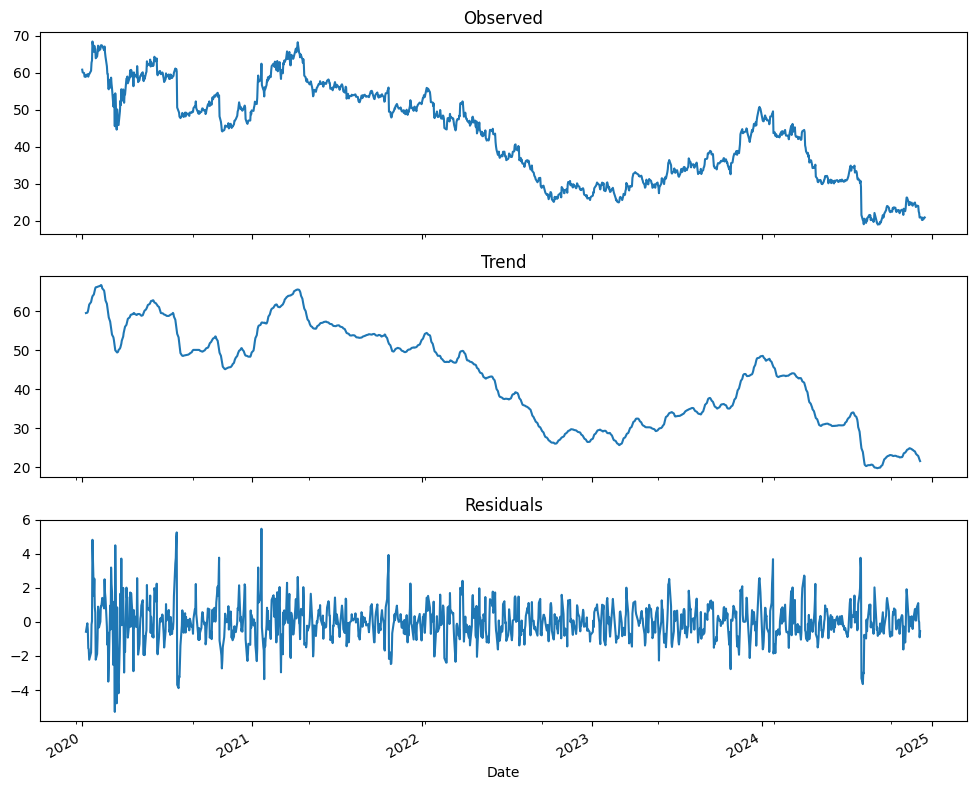

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df["INTC"], model='additive', period=12)  # Set period=1 to disable seasonality

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.resid.plot(ax=axes[2], title='Residuals')
plt.tight_layout()
plt.show()


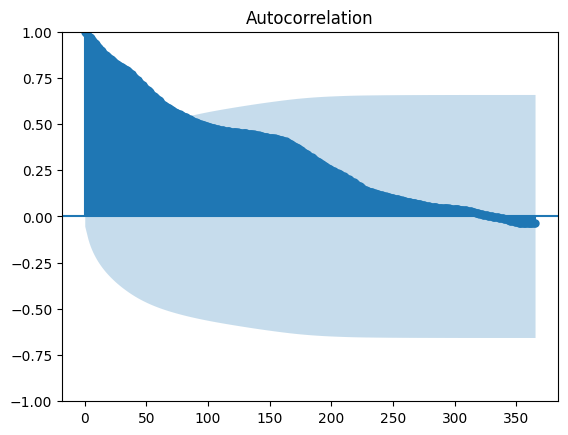

In [97]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["IBM"], lags=365)  # Check up to 365 lags
plt.show()

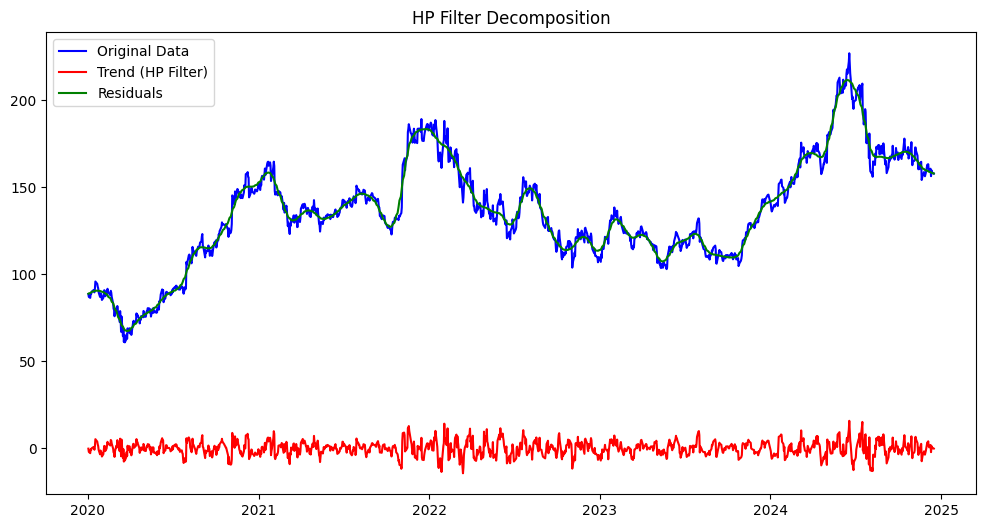

In [111]:
from statsmodels.tsa.filters.hp_filter import hpfilter

trend, residual = hpfilter(df["QCOM"], lamb=1600)

plt.figure(figsize=(12, 6))
plt.plot(df["QCOM"], label='Original Data', color='blue')
plt.plot(trend, label='Trend (HP Filter)', color='red')
plt.plot(residual, label='Residuals', color='green')
plt.legend()
plt.title("HP Filter Decomposition")
plt.show()


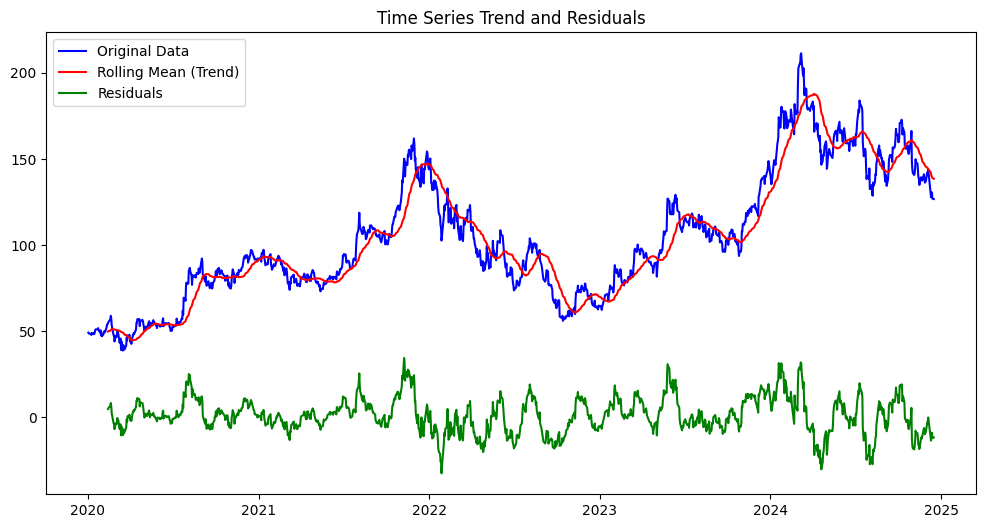

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


data_rolling_mean = df["AMD"] .rolling(window=30).mean()  # 30-day moving average
data_residuals = df["AMD"] - data_rolling_mean  # Calculate residuals

plt.figure(figsize=(12, 6))
plt.plot(df["AMD"] , label='Original Data', color='blue')
plt.plot(data_rolling_mean, label='Rolling Mean (Trend)', color='red')
plt.plot(data_residuals, label='Residuals', color='green')
plt.legend()
plt.title("Time Series Trend and Residuals")
plt.show()


## Visualization


               IBM          AMD         INTC         QCOM
count  1249.000000  1249.000000  1249.000000  1249.000000
mean    142.341851   103.513427    43.034804   135.438735
std      28.591746    36.093618    12.632926    30.263663
min      90.602295    38.709999    18.889999    60.910000
25%     123.355644    78.769997    31.270000   116.400002
50%     134.380005    96.089996    44.520000   133.649994
75%     146.860001   127.629997    53.619999   155.860001
max     238.039993   211.380005    68.470001   227.089996


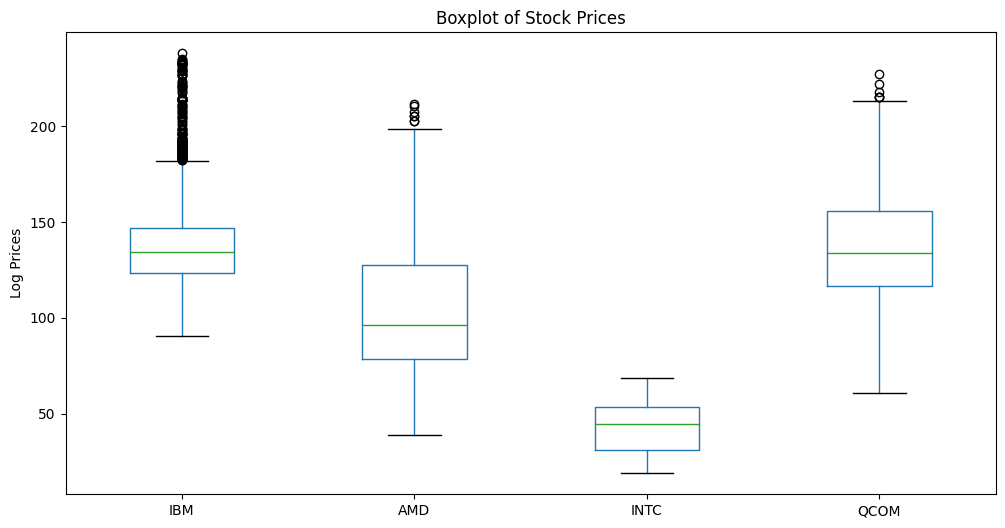

In [3]:
# Summary statistics
print(df.describe())

# Boxplot
df.boxplot(figsize=(12, 6), grid=False)
plt.title("Boxplot of Stock Prices")
plt.ylabel("Log Prices")
plt.show()


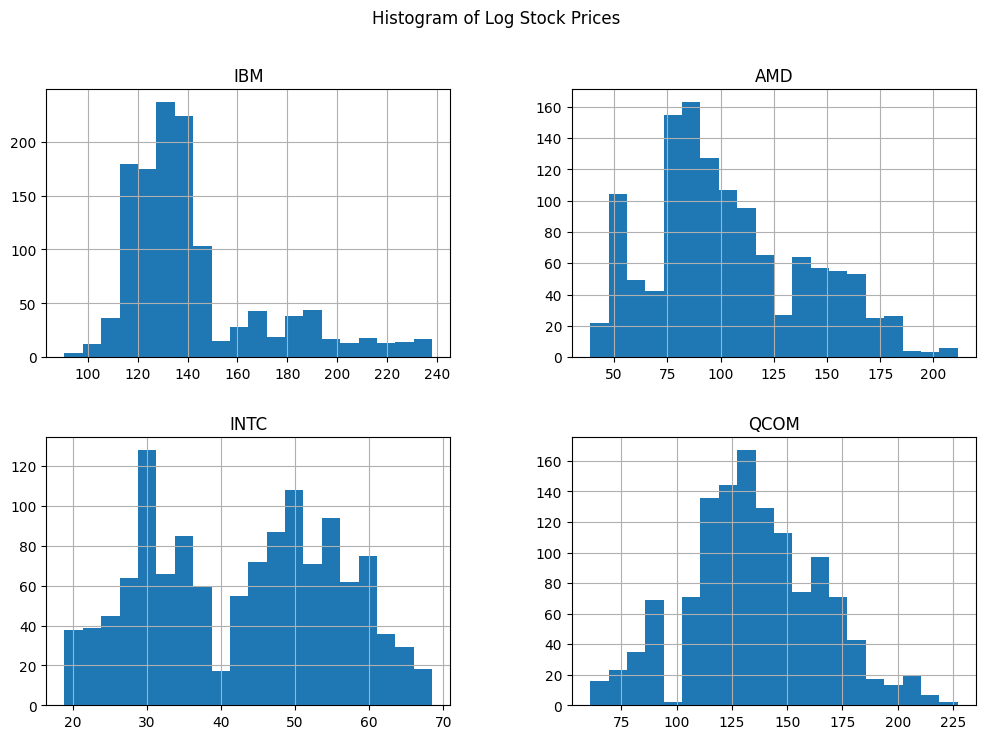

In [4]:
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogram of Log Stock Prices")
plt.show()


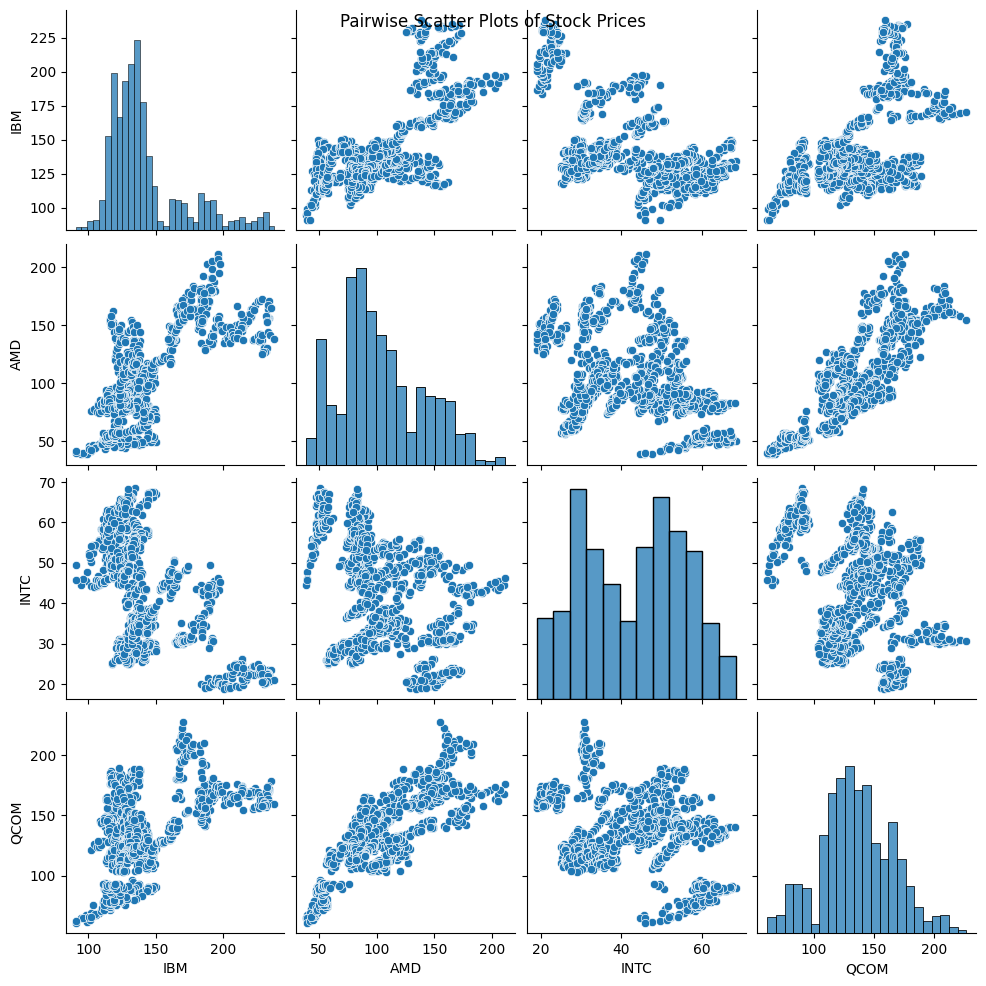

In [8]:
sns.pairplot(df)
plt.suptitle("Pairwise Scatter Plots of Stock Prices")
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

for col in df.columns:
    result = adfuller(df[col])
    print(f"{col} ADF Statistic: {result[0]}, p-value: {result[1]}")
    if result[1] < 0.05:
        print(f"{col}: Stationary")
    else:
        print(f"{col}: Non-Stationary")


IBM ADF Statistic: -0.14293427578513268, p-value: 0.9449906220023861
IBM: Non-Stationary
AMD ADF Statistic: -1.9825509269020385, p-value: 0.29427592453924
AMD: Non-Stationary
INTC ADF Statistic: -1.312163786237507, p-value: 0.6235891562448461
INTC: Non-Stationary
QCOM ADF Statistic: -2.1102641168347716, p-value: 0.24040742874956095
QCOM: Non-Stationary


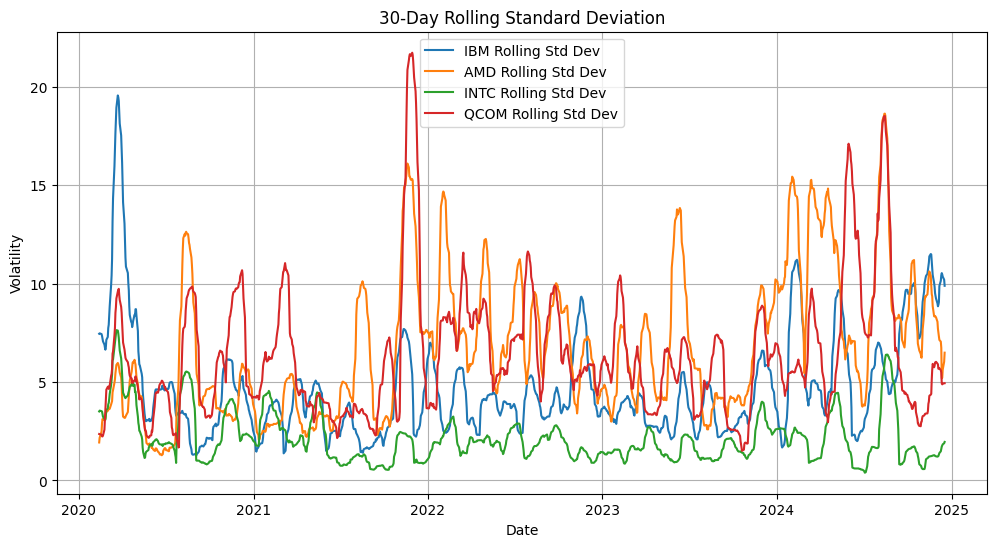

In [11]:
rolling_std = df.rolling(window=30).std()

plt.figure(figsize=(12, 6))
for col in rolling_std.columns:
    plt.plot(rolling_std[col], label=f'{col} Rolling Std Dev')
plt.title("30-Day Rolling Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


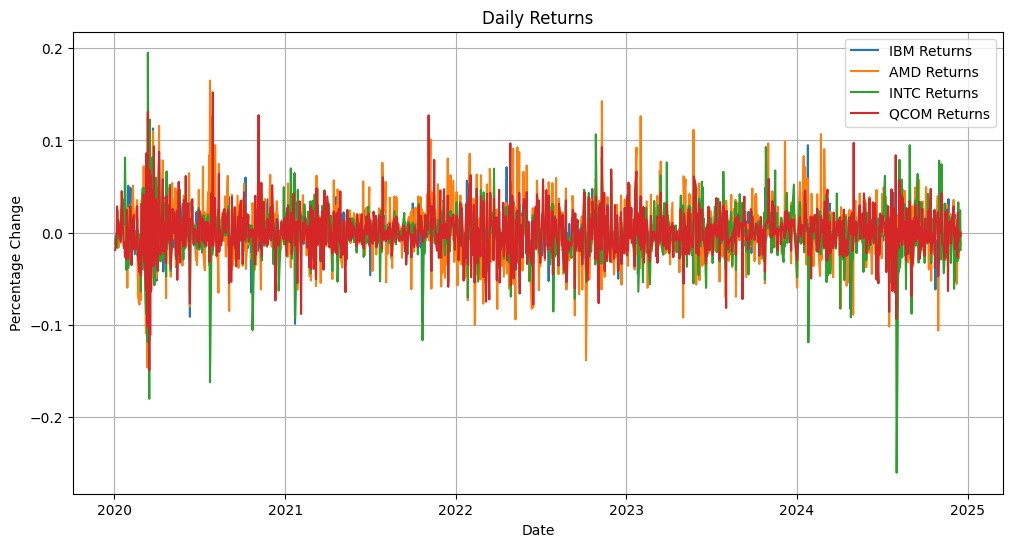

In [12]:
returns = df.pct_change().dropna()

plt.figure(figsize=(12, 6))
for col in returns.columns:
    plt.plot(returns[col], label=f'{col} Returns')
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.legend()
plt.grid(True)
plt.show()


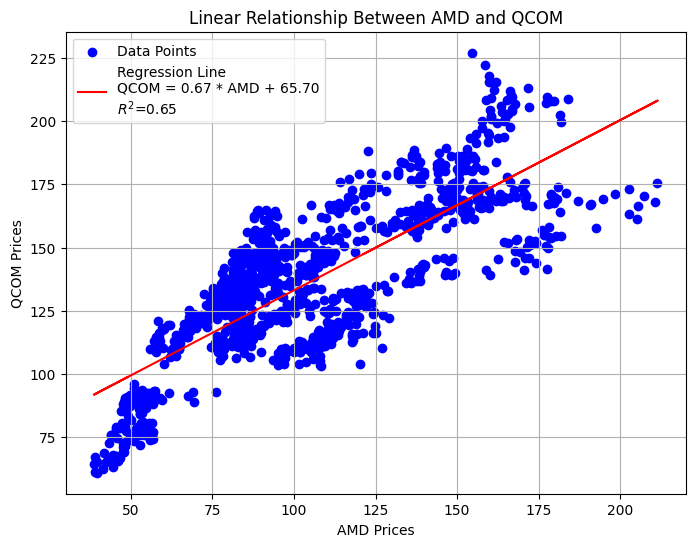

('QCOM = 0.67 * AMD + 65.70', 0.6456437200491265)

In [41]:
# Reloading necessary libraries and datasets after state reset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example dataset for demonstration purposes

# Extract variables for regression
X = df[['AMD']].values
y = df['QCOM'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients and equation
slope = model.coef_[0]
intercept = model.intercept_
equation = f"QCOM = {slope:.2f} * AMD + {intercept:.2f}"

# Predictions
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot the regression
plt.figure(figsize=(8, 6))
plt.scatter(df['AMD'], df['QCOM'], label='Data Points', color='blue')
plt.plot(df['AMD'], y_pred, label=f'Regression Line\n{equation}\n$R^2$={r2:.2f}', color='red')
plt.title('Linear Relationship Between AMD and QCOM')
plt.xlabel('AMD Prices')
plt.ylabel('QCOM Prices')
plt.legend()
plt.grid()
plt.show()

equation, r2


Regression Summary:
Equation: QCOM = 0.67 * AMD + 65.70
R^2: 0.6456
Mean of Residuals: -0.0000
Standard Deviation of Residuals: 18.0033
Skewness of Residuals: -0.1342
Kurtosis of Residuals: -0.7902
95% Confidence Interval for Intercept: (62.66128107173775, 68.73916059065841)
95% Confidence Interval for Slope: (0.6460378296391212, 0.7014773495442455)


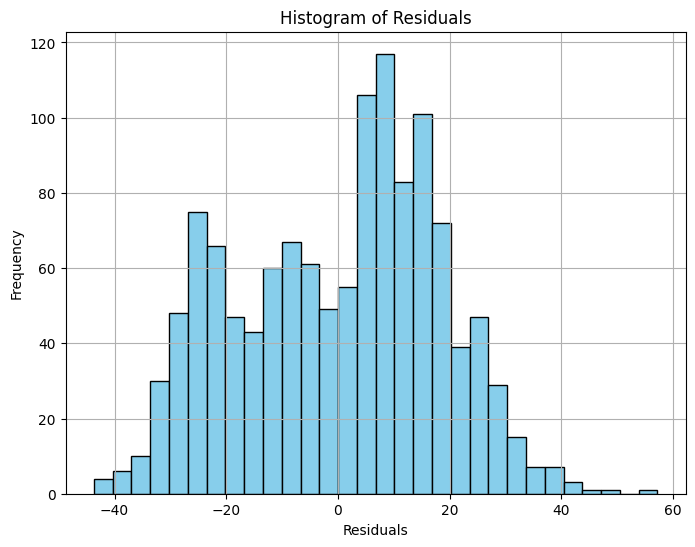

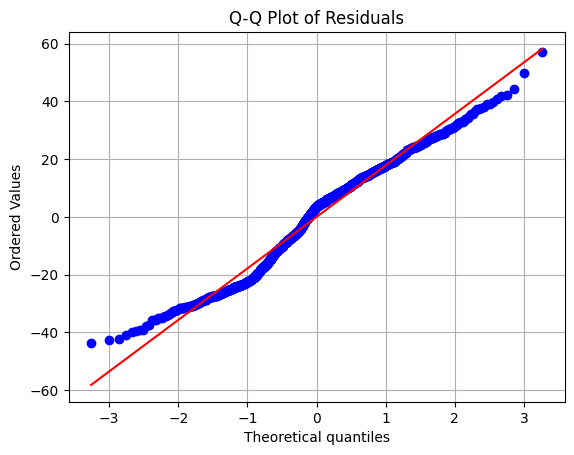

In [42]:
import numpy as np
import scipy.stats as stats

residuals = y - y_pred

mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)

X_with_intercept = np.c_[np.ones(X.shape[0]), X]  
n, k = X_with_intercept.shape
y_variance = np.var(residuals, ddof=k)
cov_matrix = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * y_variance
std_errors = np.sqrt(np.diag(cov_matrix))

t_stat = stats.t.ppf(1 - 0.025, df=n - k)  
conf_intervals = {
    'Intercept': (intercept - t_stat * std_errors[0], intercept + t_stat * std_errors[0]),
    'Slope': (slope - t_stat * std_errors[1], slope + t_stat * std_errors[1]),
}

print("Regression Summary:")
print(f"Equation: {equation}")
print(f"R^2: {r2:.4f}")
print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals: {std_residual:.4f}")
print(f"Skewness of Residuals: {skewness:.4f}")
print(f"Kurtosis of Residuals: {kurtosis:.4f}")
print(f"95% Confidence Interval for Intercept: {conf_intervals['Intercept']}")
print(f"95% Confidence Interval for Slope: {conf_intervals['Slope']}")

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid()
plt.show()


<Axes: xlabel='Date'>

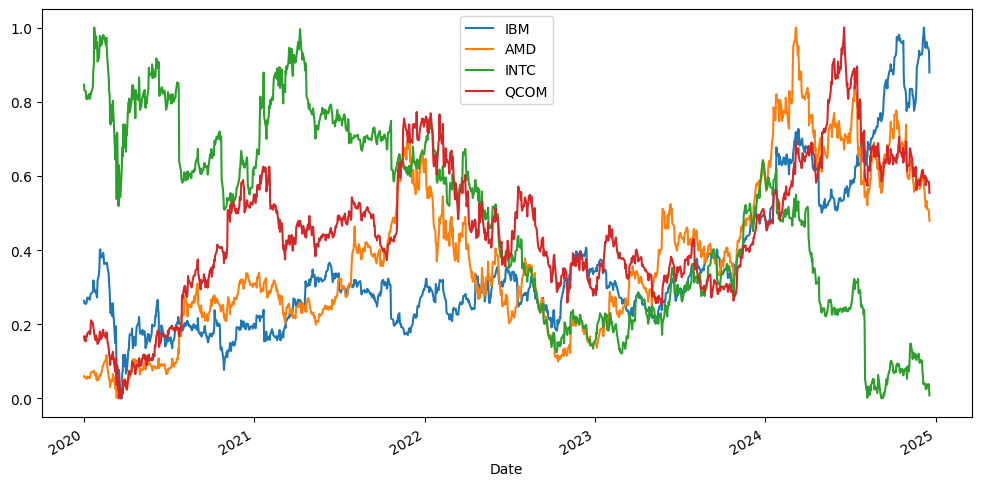

In [43]:
df_minmax.plot(figsize=(12, 6))